In [36]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 10)

In [37]:
#read price1, price2, and price3.csv
price1 = pd.read_csv('price1.csv', sep = ';')
price2 = pd.read_csv('price2.csv', sep = ';')
price3 = pd.read_csv('price3.csv', sep = ';')

price2['timestamp'] = price2['timestamp'] + price1['timestamp'].max() + 100
price3['timestamp'] = price3['timestamp'] + price2['timestamp'].max() + 100

In [38]:
combined = pd.concat([price1, price2, price3])

In [39]:
trades1 = pd.read_csv('trades1.csv', sep = ';')
trades2 = pd.read_csv('trades2.csv', sep = ';')
trades3 = pd.read_csv('trades3.csv', sep = ';')

trades2['timestamp'] = trades2['timestamp'] + price1['timestamp'].max() + 100
trades3['timestamp'] = trades3['timestamp'] + price2['timestamp'].max() + 100

In [40]:
combinedTrades = pd.concat([trades1, trades2, trades3])

In [41]:
productCharts = {item:combined[combined['product'] == item] for item in combined['product'].unique() if item != 'DOLPHIN_SIGHTINGS'}

In [42]:
buyOrders = {buyer:combinedTrades[combinedTrades['buyer'] == buyer] for buyer in combinedTrades['buyer'].unique()}
sellOrders = {seller:combinedTrades[combinedTrades['seller'] == seller] for seller in combinedTrades['seller'].unique()}

In [43]:
traders = ['Paris', 'Charlie', 'Caesar', 'Penelope', 'Camilla', 'Pablo', 'Gina', 'Gary', 'Peter', 'Olivia']

In [44]:
products = ['PINA_COLADAS', 'DIP', 'BAGUETTE', 'PICNIC_BASKET', 'BERRIES', 'DIVING_GEAR', 'BANANAS', 'COCONUTS', 'PEARLS', 'UKULELE']

['Paris', 'Charlie', 'Caesar', 'Penelope', 'Camilla', 'Pablo', 'Gina', 'Gary']


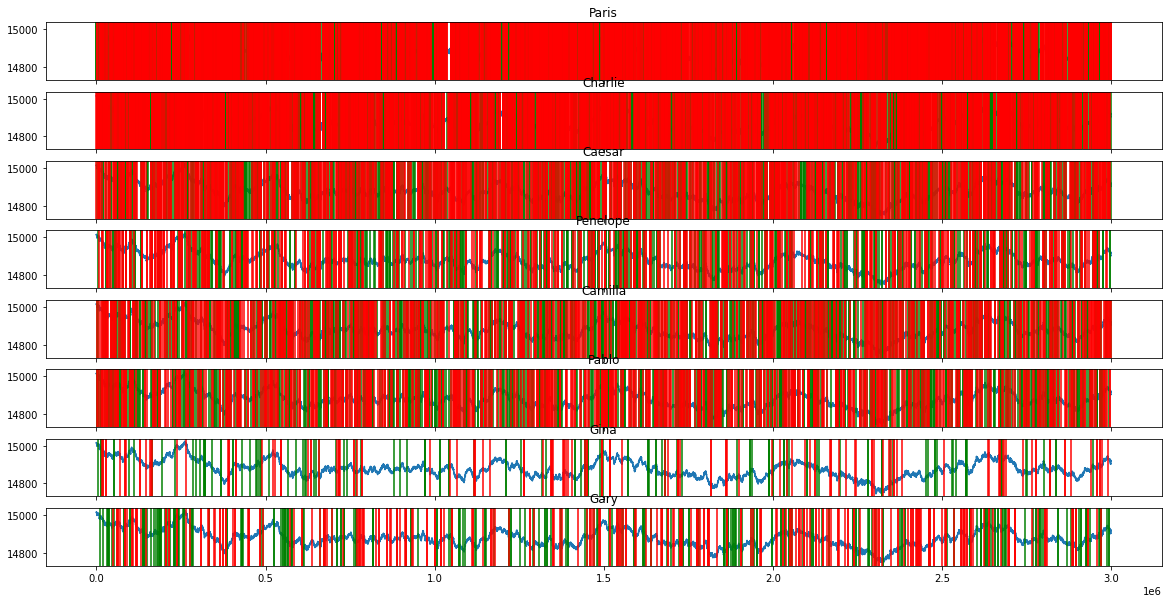

In [45]:
#PEARLS
#plot the mid_price of pearls n times if n is the number of traders
#for each chart, place a green line when a buyer makes a trade and a red line when a seller makes a trade. Loop through each trader
pearlTraders = [trader for trader in traders if 'PEARLS' in buyOrders[trader]['symbol'].unique() or 'PEARLS' in sellOrders[trader]['symbol'].unique()]
print(pearlTraders)
fig, axs = plt.subplots(len(pearlTraders), 1, sharex=True)
for i in range(len(pearlTraders)):
    axs[i].plot(productCharts['PEARLS']['timestamp'], productCharts['PINA_COLADAS']['mid_price'])
    axs[i].set_title(pearlTraders[i])
    buyTrades = buyOrders[pearlTraders[i]]
    buyTrades = buyTrades[buyTrades['symbol'] == 'PEARLS']
    for j in range(len(buyTrades)):
        axs[i].axvline(x=buyTrades['timestamp'].iloc[j], color='green')
    sellTrades = sellOrders[pearlTraders[i]]
    sellTrades = sellTrades[sellTrades['symbol'] == 'PEARLS']
    for j in range(len(sellTrades)):
        axs[i].axvline(x=sellTrades['timestamp'].iloc[j], color='red')
    


['Paris', 'Charlie', 'Penelope', 'Camilla', 'Pablo', 'Gina', 'Gary', 'Peter', 'Olivia']


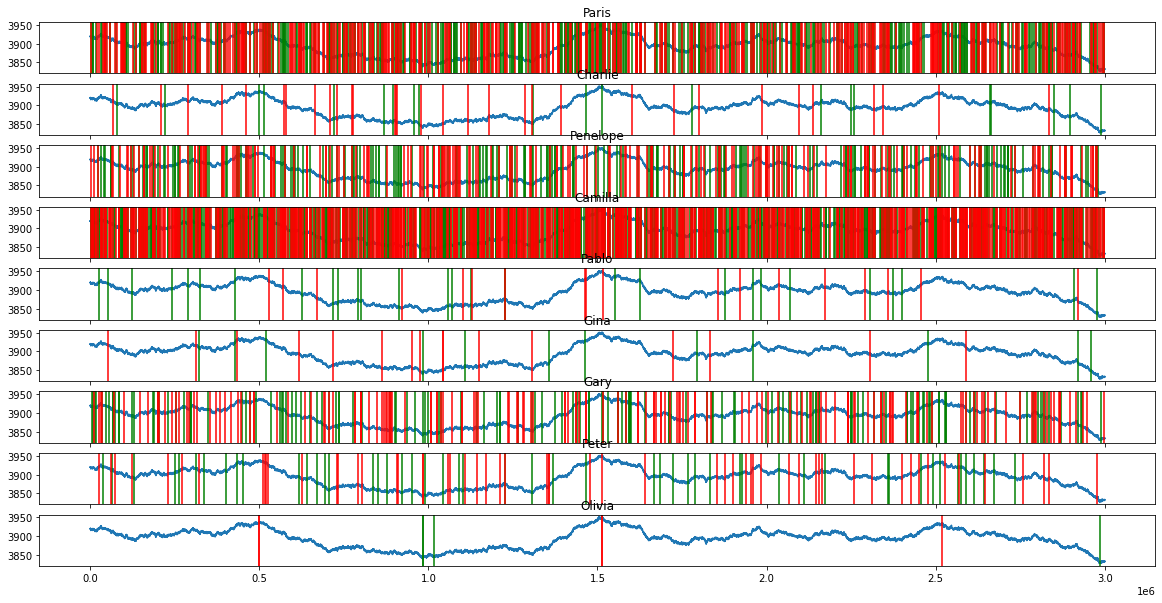

In [46]:
#BERRIES
berryTraders = [trader for trader in traders if 'BERRIES' in buyOrders[trader]['symbol'].unique() or 'BERRIES' in sellOrders[trader]['symbol'].unique()]
print(berryTraders)
fig, axs = plt.subplots(len(berryTraders), 1, sharex=True)
for i in range(len(berryTraders)):
    axs[i].plot(productCharts['BERRIES']['timestamp'], productCharts['BERRIES']['mid_price'])
    axs[i].set_title(berryTraders[i])
    buyTrades = buyOrders[berryTraders[i]]
    buyTrades = buyTrades[buyTrades['symbol'] == 'BERRIES']
    for j in range(len(buyTrades)):
        axs[i].axvline(x=buyTrades['timestamp'].iloc[j], color='green')
    sellTrades = sellOrders[berryTraders[i]]
    sellTrades = sellTrades[sellTrades['symbol'] == 'BERRIES']
    for j in range(len(sellTrades)):
        axs[i].axvline(x=sellTrades['timestamp'].iloc[j], color='red')